## Extract jobs info from LinkedIn

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from six.moves.urllib import parse
import re
import time
%matplotlib inline

In [194]:
#search page see more options
url_template = 'https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%2BScientist&location=United%2BStates&trk=public_jobs_jobs-search-bar_search-submit&sortBy=DD&start='

In [199]:
title_list = []
company_list = []
location_list = []
date_list = []
level_list = []
emptype_list = []
industry_list = []
description_list = []
start_time = time.time()

for page_num in np.arange(1000):
    #create link for each website page
    link = url_template + str(page_num)
    user_agent = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36'
    website_raw = requests.get(link, headers={'User-Agent':user_agent}).text
    soup = BeautifulSoup(website_raw, 'html.parser')
    #print(soup.prettify())
    #find job titles from each 'h3' element
    title_list.extend([title.get_text().strip() for title in soup.find_all('h3')])
    #find company name from each 'h4' element
    #Note that here I changed indicator for company to h4 because some jobs do not have company name just marked "openly"
    company_list.extend([company.get_text().strip() for company in soup.find_all('h4')])
    #find company location from each 'span' element
    location_list.extend([location.get_text().strip() for location in soup.find_all('span',{'class':'job-result-card__location'})])
    #find job posting date from each 'time' element
    date_list.extend([date.get('datetime') for date in soup.find_all('time')])
    #get url for each job on the page
    job_links = soup.find_all('a',{'class':'result-card__full-card-link'})
    for job_link in job_links:
        job_url = job_link.get('href')
        #print(job_url)
        job_web_raw = requests.get(job_url).text
        job_soup = BeautifulSoup(job_web_raw, 'html.parser')
        #print(job_soup.prettify())
        tag = job_soup.find('h3', text='Employment type')
        if tag:
            emptype_list.append(tag.find_next_siblings('span')[0].get_text())
        else:
            emptype_list.append('Not Available')
        job_context = job_soup.find('script',{'type':'application/ld+json'})
        #some job does not have descripton
        if job_context:
            job_data = json.loads(job_context.get_text())
            level_list.append(job_data['experienceRequirements'])
            industry_list.append(job_data['industry'])
            raw_description = job_data['description']
            clean_description = re.sub('<[^>]+>', '', raw_description)
            description_list.append(clean_description)
        else:
            level_list.append('Not Available')
            industry_list.append('Not Available')
            description_list.append('Not Available')
    used_time = time.time()-start_time
    if (page_num%10)==0:
        print(link)
        print("Scraped job numbers:", len(company_list), "Used time(s):", used_time)

https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%2BScientist&location=United%2BStates&trk=public_jobs_jobs-search-bar_search-submit&sortBy=DD&start=0
Scraped job numbers: 25 Used time(s): 18.26202130317688
https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%2BScientist&location=United%2BStates&trk=public_jobs_jobs-search-bar_search-submit&sortBy=DD&start=10
Scraped job numbers: 275 Used time(s): 199.49348521232605
https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%2BScientist&location=United%2BStates&trk=public_jobs_jobs-search-bar_search-submit&sortBy=DD&start=20
Scraped job numbers: 525 Used time(s): 382.13392901420593
https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%2BScientist&location=United%2BStates&trk=public_jobs_jobs-search-bar_search-submit&sortBy=DD&start=30
Scraped job numbers: 775 Used time(s): 563.5902140140533
https://www.linkedin.com

https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%2BScientist&location=United%2BStates&trk=public_jobs_jobs-search-bar_search-submit&sortBy=DD&start=340
Scraped job numbers: 8475 Used time(s): 6810.791646003723
https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%2BScientist&location=United%2BStates&trk=public_jobs_jobs-search-bar_search-submit&sortBy=DD&start=350
Scraped job numbers: 8725 Used time(s): 6992.799170255661
https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%2BScientist&location=United%2BStates&trk=public_jobs_jobs-search-bar_search-submit&sortBy=DD&start=360
Scraped job numbers: 8975 Used time(s): 7180.670328140259
https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%2BScientist&location=United%2BStates&trk=public_jobs_jobs-search-bar_search-submit&sortBy=DD&start=370
Scraped job numbers: 9225 Used time(s): 7358.400944232941
https://www.link

SSLError: HTTPSConnectionPool(host='www.linkedin.com', port=443): Max retries exceeded with url: /jobs/view/data-scientist-senior-at-usaa-1737831099?refId=997fd8cd-23f9-4506-80fa-4e6b8116bb59&position=18&pageNum=25&trk=public_jobs_job-result-card_result-card_full-click (Caused by SSLError(SSLError("bad handshake: SysCallError(54, 'ECONNRESET')")))

In [207]:
print(len(title_list))
print(len(company_list))
print(len(location_list))
print(len(date_list))
print(len(level_list))
print(len(emptype_list))
print(len(industry_list))
print(len(description_list))

16026
16025
16025
16025
16017
16017
16017
16017


In [209]:
title_list_1 = title_list[:16000]
company_list_1 = company_list[:16000]
location_list_1 = location_list[:16000]
date_list_1 = date_list[:16000]
level_list_1 = level_list[:16000]
emptype_list_1 = emptype_list[:16000]
industry_list_1 = industry_list[:16000]
description_list_1 = description_list[:16000]

In [210]:
df_1 = pd.DataFrame()
df_1['title'] = title_list_1
df_1['company'] = company_list_1
df_1['location'] = location_list_1
df_1['date'] = date_list_1
df_1['seniority level'] = level_list_1
df_1['employment type'] = emptype_list_1
df_1['industry'] = industry_list_1
df_1['description'] = description_list_1


In [211]:
df_1

,title,company,location,date,seniority level,employment type,industry,description
0,Data Scientist,The Robinson Group,"Cincinnati, Ohio, United States",2020-06-15,Mid-Senior level,Full-time,"Consumer Electronics,Management Consulting",The Robinson Group is partnered with a longsta...
1,Associate Data Scientist,The Home Depot,"Atlanta, Georgia, United States",2020-06-15,Entry level,Full-time,"Information Technology and Services,Retail,Fin...",POSITION PURPOSEThe Associate Data Scientist w...
2,Senior Data Analyst,Ascential,"Salt Lake City, Utah, United States",2020-06-15,Associate,Full-time,Information Services,We're looking for a Senior Data Analyst to joi...
3,Data Analyst Nursing,Grady Health System,"Atlanta, Georgia, United States",2020-06-15,Entry level,Full-time,"Health, Wellness and Fitness,Medical Practice,...",Grady Health System offers many career paths f...
4,"Sr. Manager, Data Science, Personalization & O...",Wiley Job Network,"Vienna, Virginia, United States",2020-06-15,Mid-Senior level,Full-time,"Information Technology and Services,Staffing a...","Towers Crescent (12066), United States of Amer..."
...,...,...,...,...,...,...,...,...
15995,Data Analyst,Albany Charter School Network,"Spring Valley, Minnesota, United States",2020-06-13,Entry level,Full-time,"Primary/Secondary Education,Higher Education,E...",https://jobs.crelate.com/portal/workmonger/job...
15996,Data Analyst,Amazon,"Nashville, Tennessee, United States",2020-06-13,Mid-Senior level,Full-time,"Computer Software,Information Technology and S...","DescriptionWorkforce Staffing (WFS), a divisio..."
15997,"Manager, Data Science - Labor Markets",Accenture Federal Services,"Reston, Virginia, United States",2020-06-13,Mid-Senior level,Full-time,"Information Technology and Services,Computer S...",Organization: Accenture Federal ServicesLocati...
15998,Federal - Data Scientist ++++++++++++++,Amazon,"Seattle, Washington, United States",2020-06-13,Mid-Senior level,Full-time,"Computer Software,Information Technology and S...",DescriptionAn information-rich and accurate pr...


In [212]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 8 columns):
title              16000 non-null object
company            16000 non-null object
location           16000 non-null object
date               16000 non-null object
seniority level    16000 non-null object
employment type    16000 non-null object
industry           16000 non-null object
description        16000 non-null object
dtypes: object(8)
memory usage: 1000.1+ KB


In [213]:
df_1.to_csv('/Users/tingtingweng/Documents/linkedin_jobs_part1.csv', header=True, index=False)

In [3]:
ds_jobs = pd.read_csv('/Users/tingtingweng/Documents/linkedin_jobs_part1.csv',parse_dates=['date'])

### Clean the text data

To format our data and build the Term-doc incidence matrix, many operations will be performed on the data :

- Stop words removal
- Stemming
- Punctuations
- Lowering

#### Stopwords

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tingtingweng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### stemming

In [5]:
from nltk.stem import SnowballStemmer # Stemmers remove morphological affixes from words, leaving only the word stem.
snow = SnowballStemmer('english') 
print(snow.stem('tasty'))
print(snow.stem('joined'))
print(snow.stem('apples'))

tasti
join
appl


#### Punctuations Removal

In [6]:
import re
# cleaning punctuations from the sentence
sentence = "I'd like to have some coffee today!"
sentence = re.sub(r'[\'|"|#]', r'', sentence) # remove these punctuation
sentence = re.sub(r'[?|!|.|,|)|(|\|/]',r' ',sentence) # replace these punctuation with space
sentence

'Id like to have some coffee today '

#### combine

In [38]:
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower() # lower case
    sentence = re.sub(r'[?|!|.|,|)|(|\|/]',r' ',sentence) # replace these punctuation with space
    tokens = sentence.split()
    #remove stopwords
    for t in tokens:
        if t in stop:
            tokens.remove(t)
    out = []
    #for t in tokens:
    #    out.append(snow.stem(t))
    out = " ".join(tokens)
    out = re.sub(r'[\'|"|#]', r'', out) # remove these punctuation
    return out

In [39]:
ds_jobs['description_clean'] = ds_jobs['description'].apply(cleanup)

#### WorldClouds

In [231]:
!pip install wordcloud

     |████████████████████████████████| 163kB 513kB/s eta 0:00:01


In [40]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=None,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

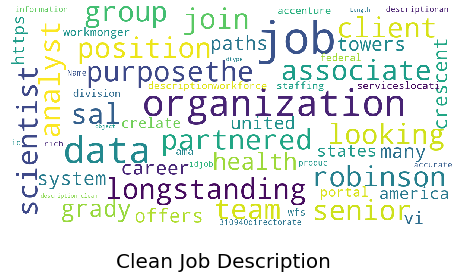

In [41]:
show_wordcloud(ds_jobs['description_clean'], title = "Clean Job Description")

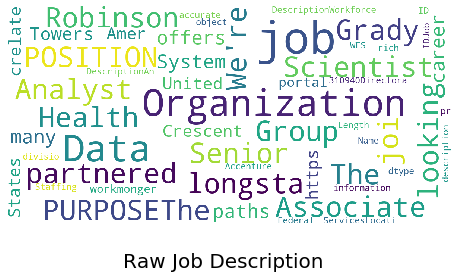

In [42]:
show_wordcloud(ds_jobs['description'], title = "Raw Job Description")

### Convert text to vector

#### 1) Uni-gram BOW

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
uni_gram = CountVectorizer(min_df = 5, binary = True) # only use keyword which shows up more than 5 times. 
uni_gram_vectors = uni_gram.fit_transform(ds_jobs['description_clean'].values)

In [15]:
uni_gram_vectors.shape

(16000, 10388)

In [18]:
features = uni_gram.get_feature_names()
features[0:10]

['00',
 '000',
 '0009',
 '000ndash99',
 '0028',
 '0055',
 '00am',
 '00job',
 '00pm',
 '01']

#### 2)Bi-gram BOW

In [19]:
bi_gram = CountVectorizer(ngram_range=(1,2), min_df = 5, binary = True)
bi_gram_vectors = bi_gram.fit_transform(ds_jobs['description_clean'].values)

In [20]:
bi_gram_vectors.shape

(16000, 93199)

In [21]:
features = bi_gram.get_feature_names()
features[0:10]

['00',
 '00 am4',
 '00 am5',
 '00 annual',
 '00 hour',
 '00 pm',
 '000',
 '000 110',
 '000 175',
 '000 48']

#### 3) tf-idf

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df = 5)
tfidf_vectors = tfidf.fit_transform(ds_jobs['description_clean'].values)

In [44]:
tfidf_vectors.shape

(16000, 103704)

In [45]:
features = tfidf.get_feature_names()
features[0:10]

['00',
 '00 am4',
 '00 am5',
 '00 annually',
 '00 hour',
 '00 pm',
 '000',
 '000 110',
 '000 175',
 '000 48']

#### NMF (Nonnegative Matrix Factorization)

In [46]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [47]:
n_samples = 1000000
NMF_topics = 50
NMF_top_words = 15

LDA_topics = 100
LDA_top_words = 10

In [48]:
nmf = NMF(n_components=NMF_topics, init='nndsvda', random_state=1,alpha=.1, l1_ratio=.5).fit(tfidf_vectors)

In [49]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: \n" %(topic_idx+1))
        raw_list = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        weight = [str(topic[i]) for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(",".join(raw_list))
        print('\n')
        print(",".join(weight))
        print('\n')
        #print('Maximum difference: %d'%(float(weight[0])-float(weight[1])))
        #print('\n')

In [50]:
tfidf_feature_names = tfidf.get_feature_names()
print_top_words(nmf, tfidf_feature_names, NMF_top_words)

Topic #1: 

quantum,ibm,qiskit,progressive,industries,career,the,you,principles,linear,expertise,data,world,optimization,within


1.8239508409847311,1.1574021480572998,0.48524388797358153,0.47584655038523266,0.4234263572353942,0.4052350813491988,0.40144873349057464,0.3842813508556192,0.35545363748187836,0.34430125283293395,0.3271579892662338,0.32399972685783407,0.3208167793099378,0.30071185438982434,0.29327656109523814


Topic #2: 

data,the,experience,business,analytics,work,analysis,science,team,skills,ability,solutions,management,development,sql


2.474424092415632,1.0911718323766222,0.9619754214915008,0.9233809513533173,0.528561695859212,0.4995152719852054,0.45633827277127786,0.4525995296162849,0.4465236482219212,0.44003311753718927,0.4287834000938552,0.4192543774660969,0.4071499158980582,0.4001869416075207,0.3870977915832211


Topic #3: 

clinical,clinical scientist,clinical science,activities,trial,clinical development,development,assigned,therapeutic area,program,scientific,ther

front end,front,backend,angular,their customers,end,village,greenwood,greenwood village,dashboard,product,customers,acceptable,end work,working next


0.5184683595186242,0.48797457234092007,0.3575697928749422,0.3506932359512724,0.3461320816603468,0.32752010517875696,0.3077959004331784,0.3077959004331784,0.3077959004331784,0.28457569129529464,0.2712423333550349,0.243871785733564,0.22590615816082693,0.18939109789420067,0.18939109789420067


Topic #29: 

myers squibb,squibb,myers,work environment,research,bristol myers,bristol,personal,work,environment,patients,squibb global,the,lives,pursue


0.33847905454143074,0.33847905454143074,0.33815731659582676,0.33740626756110637,0.28718486655053094,0.2803477359135932,0.2803477359135932,0.22481590051310116,0.21719475670312563,0.20990053477745121,0.20283066227453883,0.17050976963895,0.1647123407426705,0.16296322080415743,0.16155180890528284


Topic #30: 

fee schedules,fee,implement changes,schedules,drg,cms,medical bill,procurement interpretation